the data is from the Winter Olympics 2022 Figure Skating Free Skate Porgram Score of top 25/24 Women's Singles and Men's Singles. The top 25/24 were selected based on their short program results out of total 30 participants (29 in actuall due to participants' withdrawal cases of doping and covid positive). All data are retrieved from https://results.isu.org/results/season2122/owg2022/. 

1. Identify a data set with at least 40 observations and two continuous, quantitative variables that can be explored with a standard OLS regression. (In other words, where we could hypothesize that X has some measurable effect on Y). Download this data set, OR access it via URL in your Jupyter Notebook.

In this data set, I will argue that there's a positive correlation between figure skaters' TES (Total Elements Score), which is also the technical score, and skaters' PCS (Program Component Score), which is also the performance score. TES evaluates the skater's technical skills such as jumpings, spinnings, and step sequences. PCS evaluates skaters' performances, therefore their artistic interpretations, choreography and understandings of the music, transitions between movements, etc. I will hypothesize that if a skater has a higher technical score (TES), it means that it's more likely for them to get a higher performance score (PCS), regardless of factors like judges' subjectivities or their overall abilities.  

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [178]:
data = pd.read_csv('2022_Winter_Olympics_FS_FS_Score copy.csv')

In [179]:
data.describe()

,Rank,PCS,TES,Deductions,Total
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,12.755102,73.108163,74.950204,-0.653061,147.405306
std,7.148807,12.197854,17.794106,0.969343,29.112866
min,1.000000,51.260000,45.960000,-4.000000,96.070000
25%,7.000000,62.350000,61.740000,-1.000000,123.370000
50%,13.000000,71.700000,72.670000,0.000000,142.240000
75%,19.000000,83.560000,84.750000,0.000000,170.640000
max,25.000000,97.220000,121.410000,0.000000,218.630000


2. Produce a static, 2D plot of this relationship as we have done in class. Print your copy. By hand, comment on the plot. Highlight what you did well.

In [180]:
f_tes = data[data['Gender'] == 'F']['TES']
f_pcs = data[data['Gender'] == 'F']['PCS']

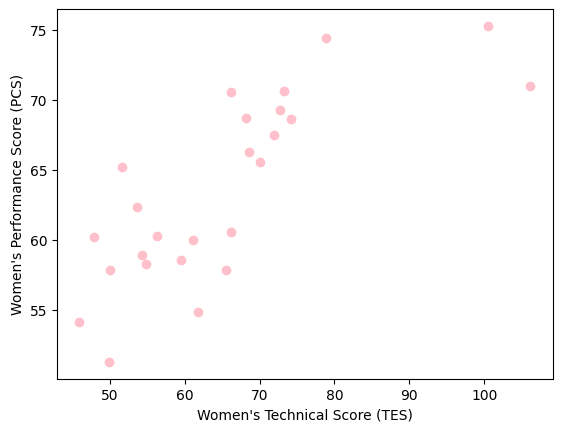

In [181]:
plt.scatter(f_tes, f_pcs, color = "pink")
plt.xlabel("Women's Technical Score (TES)", fontsize = 10)
plt.ylabel("Women's Performance Score (PCS)", fontsize = 10)
plt.show()

In [182]:
# Add a constant to x 
fx = sm.add_constant(f_tes)

# Fit the model using OLS
f_results = sm.OLS(f_pcs, fx).fit()
print(f_results.summary())

# Extract slope and intercept from the results
f_intercept, f_slope = f_results.params

                            OLS Regression Results                            
Dep. Variable:                    PCS   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     34.17
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           5.88e-06
Time:                        19:57:45   Log-Likelihood:                -70.488
No. Observations:                  25   AIC:                             145.0
Df Residuals:                      23   BIC:                             147.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.2086      3.907     10.548      0.0

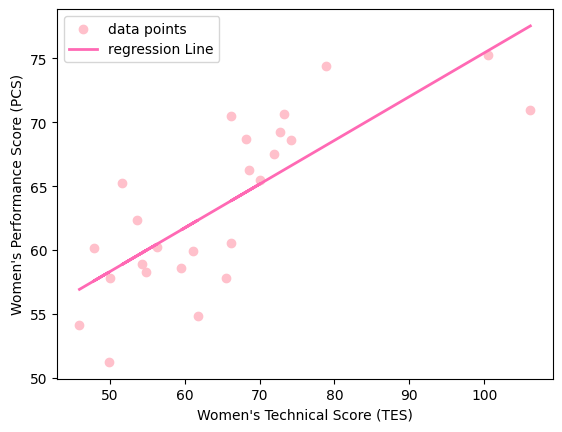

In [183]:
# regression line
f_reg = f_slope * np.array(f_tes) + f_intercept
# or (f_reg = 0.3421*fx + 41.2086), but it starts from zero and the plot looks ugly

#create the plot
plt.scatter(f_tes, f_pcs, color="pink", label="data points")
plt.plot(f_tes, f_reg, lw=2, color="hotpink", label="regression Line")

# Label the axes
plt.xlabel("Women's Technical Score (TES)", fontsize=10)
plt.ylabel("Women's Performance Score (PCS)", fontsize=10)

# Show the plot
plt.legend() 
plt.show()

3. Result for Men's Score:

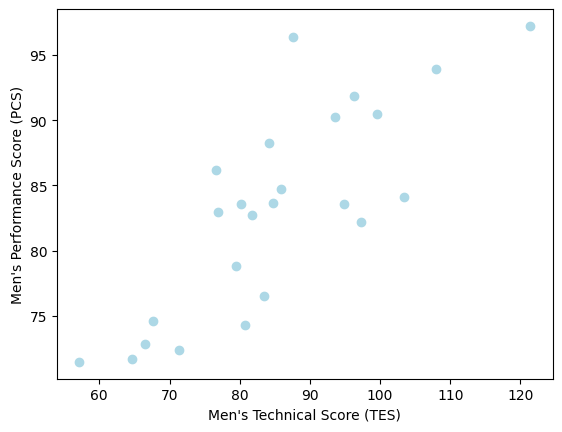

In [184]:
m_tes = data[data['Gender'] == 'M']['TES']
m_pcs = data[data['Gender'] == 'M']['PCS']

plt.scatter(m_tes, m_pcs, color = "lightblue")
plt.xlabel("Men's Technical Score (TES)", fontsize = 10)
plt.ylabel("Men's Performance Score (PCS)", fontsize = 10)
plt.show()

In [187]:
# Add a constant to x
mx = sm.add_constant(m_tes)

# Fit the model using OLS
m_results = sm.OLS(m_pcs, mx).fit()

# Print a summary of the regression results
print(m_results.summary())

# Extract slope and intercept from the results
m_intercept, m_slope = m_results.params

                            OLS Regression Results                            
Dep. Variable:                    PCS   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     40.23
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           2.21e-06
Time:                        20:17:03   Log-Likelihood:                -70.469
No. Observations:                  24   AIC:                             144.9
Df Residuals:                      22   BIC:                             147.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.0845      5.763      8.170      0.0

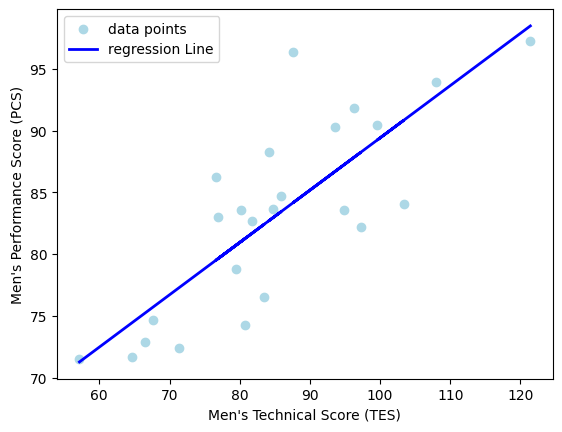

In [186]:
# regression line
m_reg = m_slope * np.array(m_tes) + m_intercept
# or (m_reg = 0.4232*fx + 47.0845)

#create plot
plt.scatter(m_tes, m_pcs, color="lightblue", label="data points")
plt.plot(m_tes, m_reg, lw=2, color="blue", label="regression Line")

# Label axes
plt.xlabel("Men's Technical Score (TES)", fontsize=10)
plt.ylabel("Men's Performance Score (PCS)", fontsize=10)

plt.legend() 
plt.show()

Conclusion: it is proved that both women and men single figure skaters will have higher performance scores(PCS) if their technical scores are also higher (TES). It's possible that judges consciously or unconsciously evaluate higher towards figure skaters who possess better technical skills, or it's also possible that figure skaters with better technical skills will naturally/automatically also possess the talent to perform better/more artistically on ice. In either case, there's a strong positive relationship between technical scores and performance scores in single figure skating of both genders. 

Notes: all codes are adjusted and based on the codes from DIGS 20002: Introduction to Statistics Using Python in Week6 Lab on regression model https://canvas.uchicago.edu/courses/59847/files/12132754?module_item_id=2543761.